In [1]:
import os
import random

import numpy as np

from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

from models import *

In [2]:
plt.rcParams["figure.figsize"] = (15, 20)
np.random.seed(42)

In [3]:
# first, read in the nouns
with open("data/2000_nouns_sorted.txt") as reader:
    nouns = reader.read().split("\n")
    # strip whitespace
    nouns = list(map(lambda _:_.strip(), nouns))
nouns[:5]

['dollar', 'formula', 'pound', 'quote', 'ability']

In [4]:
# we load only the embeddings we want, and store them back to reuse
def read_model(model_name):
    pkl_file = "./models/2000_nouns_{}.pkl".format(model_name)
    if not os.path.exists(pkl_file):
        print("Model doesn't exist, creating it")
        word_index, embeddings = read_embedding_file("./data/{}.bz2".format(model_name), selected_words=nouns)
        sim = WordSimilarityModel(word_index, embeddings)
        pkl.dump(sim, open(pkl_file, "wb"))
        return sim
    return pkl.load(open(pkl_file, "rb"))

bow2_sim = read_model("bow2.words")
bow5_sim = read_model("bow5.words")
deps_sim = read_model("deps.words")

Using t-SNE
Projecting to 50-dim space using PCA
	... done
Performing t-SNE
	... done


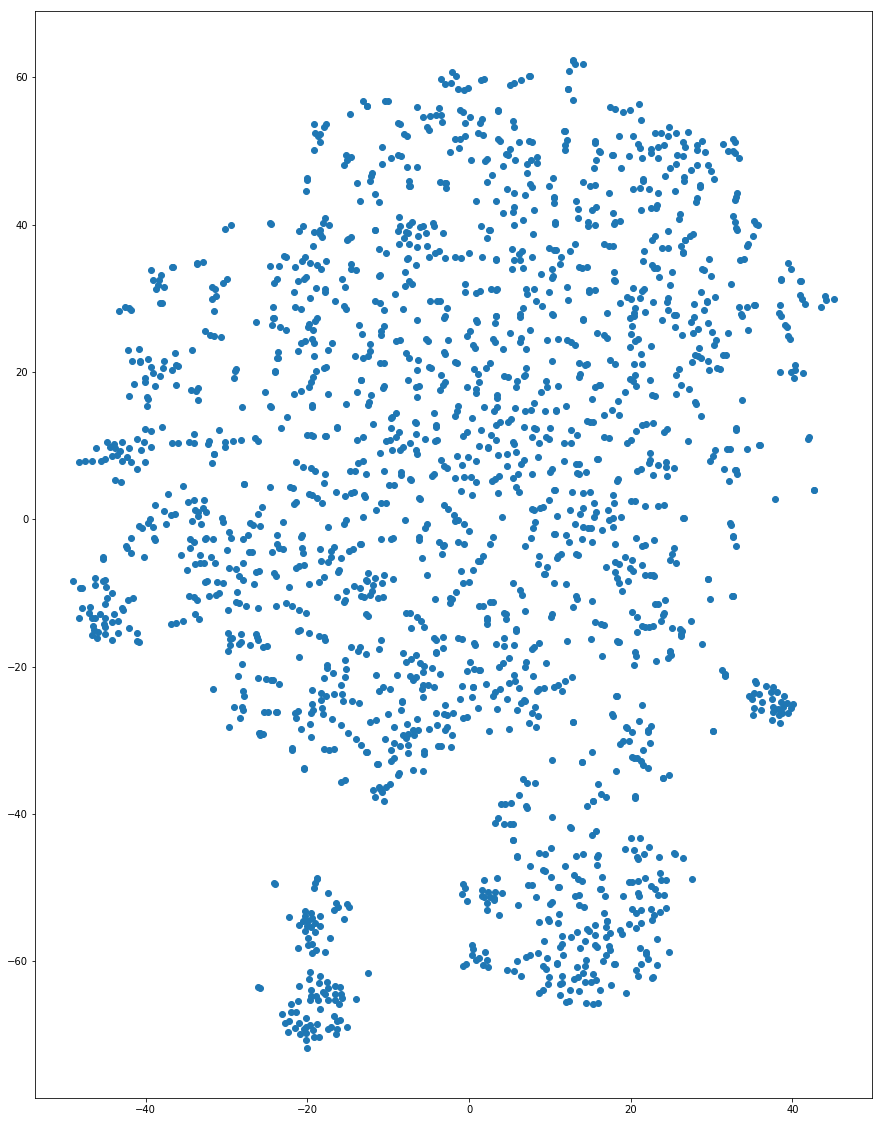

In [13]:
def reduce_dim(nouns, model, method):
    if method not in {"tsne", "isomap"}: raise ValueError() ;
    
    matrix = np.zeros((len(model.embeddings), len(model.embeddings[0])))
    words = []
    for word, index in model.word_index.items():
        matrix[index] = model[word]
        words.append(word)
    if method == "tsne":
        print("Using t-SNE")
        # TSNE can't handle large dimensions, so use PCA to project it to 50-dim space
        print("Projecting to 50-dim space using PCA")
        pca = PCA(n_components=50)
        matrix_transformed = pca.fit_transform(matrix)
        print("\t... done")
        
        print("Performing t-SNE")
        tsne = TSNE(n_components=2)
        matrix_viz = tsne.fit_transform(matrix_transformed)
        print("\t... done")
        
        # TODO down-sample
        plt.scatter(matrix_viz[:, 0], matrix_viz[:, 1])
        return words, matrix_viz
    
    else:
        pass
        
        

words, lowdim = reduce_dim(nouns, deps_sim, "tsne")    

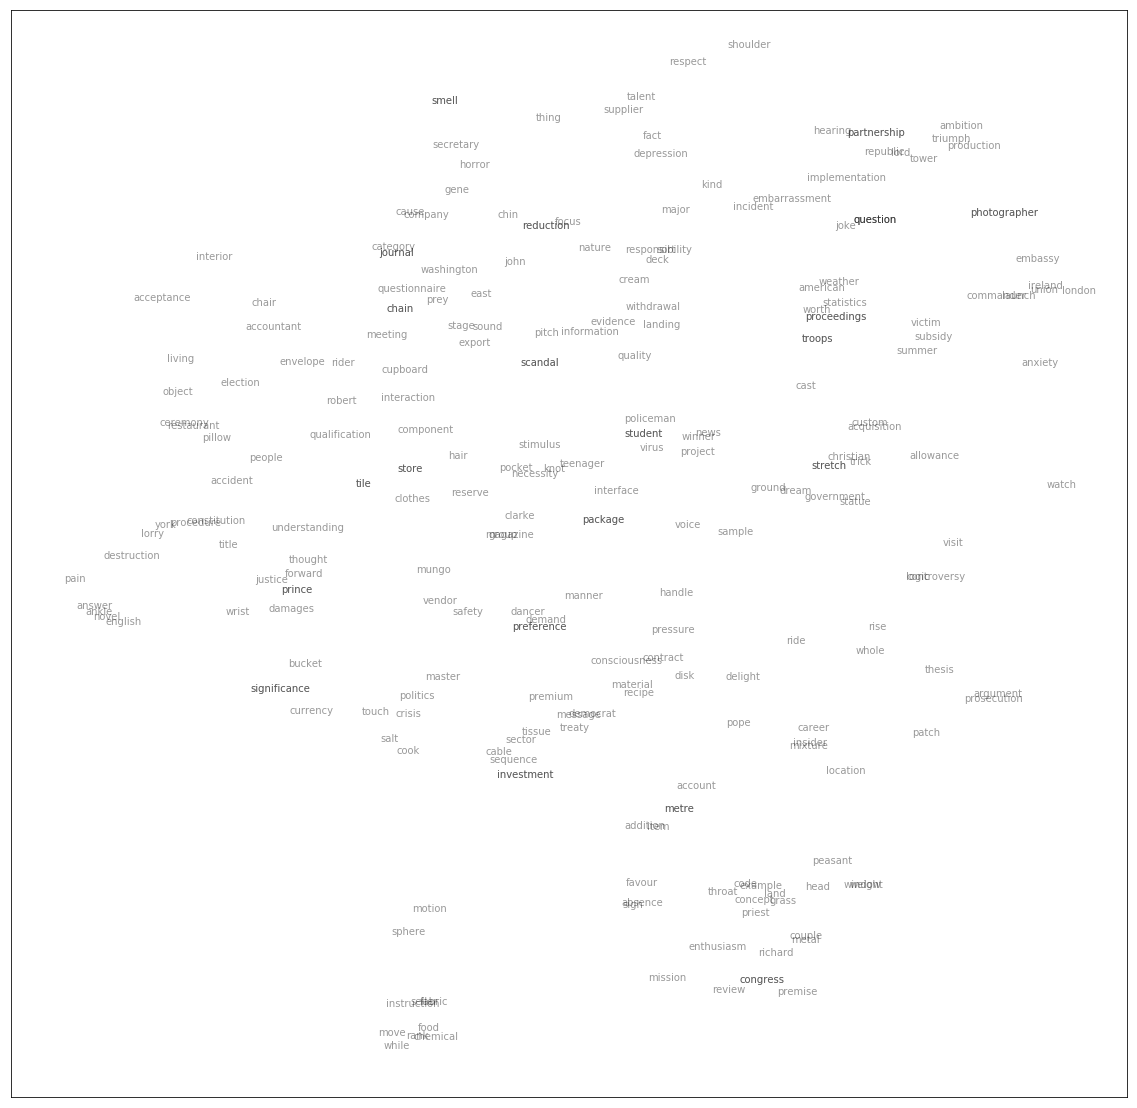

In [16]:
word_idx = list(zip(words, np.arange(len(words))))
n = 250
plt.figure(figsize=(20, 20))

for _ in np.arange(n):
    word, idx = random.choice(word_idx)
    x, y = lowdim[idx]
    plt.text(x, y, word, alpha=0.4)
    

plt.xlim(lowdim[:, 0].min() - 5, lowdim[:, 0].max() + 5)
plt.ylim(lowdim[:, 1].min() - 5, lowdim[:, 1].max() + 5)
plt.xticks([])
plt.yticks([])
plt.show()